In [1]:
library(SCnorm)
library(SingleCellExperiment)

Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsp

In [2]:
umi <- readRDS("post_common_normalisation_approaches.rds")

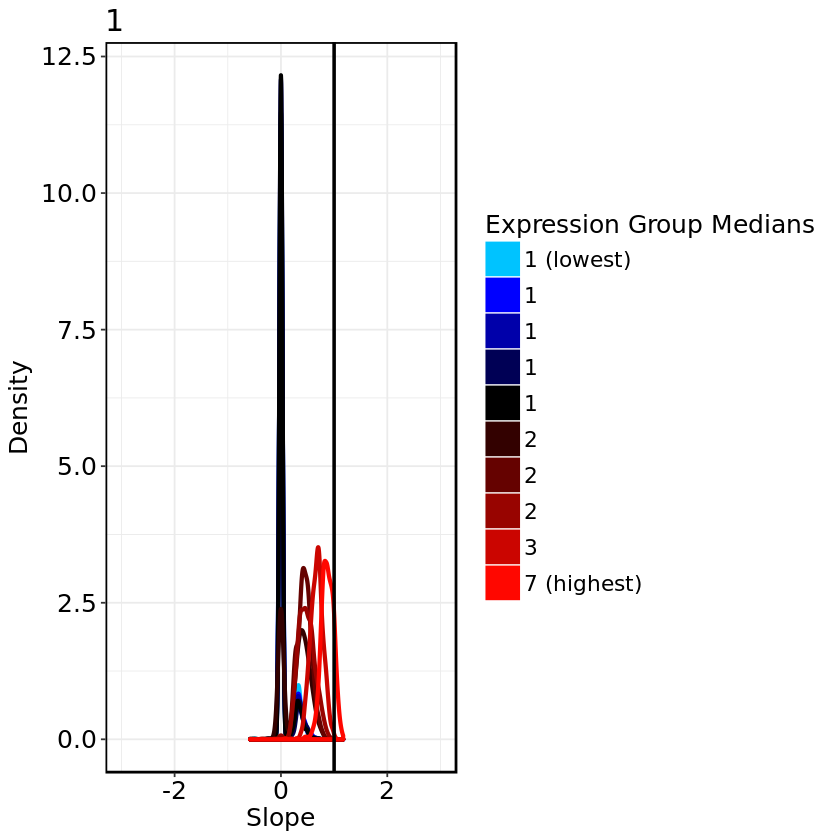

In [5]:
scd <- SummarizedExperiment::SummarizedExperiment(
    assays = list("Counts" = counts(umi))
)

conditions = rep(c(1), each= 192)

countDeptEst <- plotCountDepth(
    Data = scd, Conditions = conditions,
    FilterCellProportion = .1, 
    NCores=3
)

In [6]:
head(countDeptEst[[1]])
#scd

Gene,Group,Slope
Brachyury,8,0.2017307
ENSMUSG00000000001,10,0.8016053
ENSMUSG00000000028,1,0.0000000
ENSMUSG00000000031,6,0.1955144
ENSMUSG00000000056,1,0.0000000
ENSMUSG00000000078,8,0.6680676


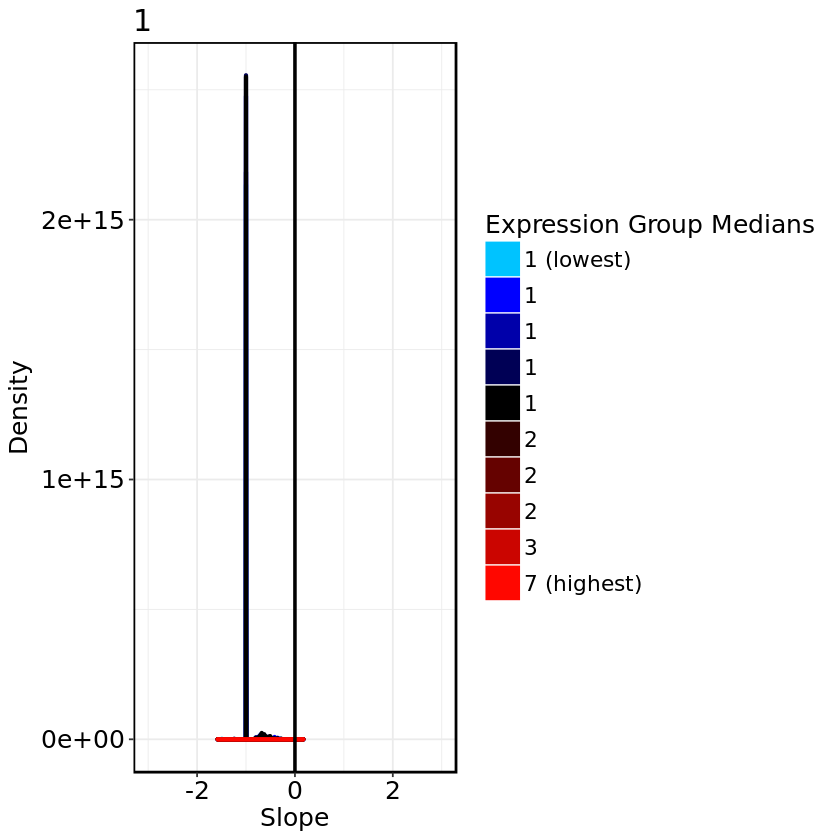

In [7]:
scd_counts <- SCnorm::getCounts(scd)
#scd
scd.cpm <- t((t(scd_counts) / colSums(scd_counts)) * mean(colSums(scd_counts)))

countDeptEst.cpm <- plotCountDepth(
    Data = scd,
    NormalizedData = scd.cpm,
    Conditions = conditions,
    FilterCellProportion = .1, 
    NCores=8
)

In [8]:
head(countDeptEst.cpm[[1]])

Gene,Group,Slope
Brachyury,8,-0.7982693
ENSMUSG00000000001,10,-0.1983947
ENSMUSG00000000028,1,-1.0000000
ENSMUSG00000000031,6,-0.8044856
ENSMUSG00000000056,1,-1.0000000
ENSMUSG00000000078,8,-0.3319324


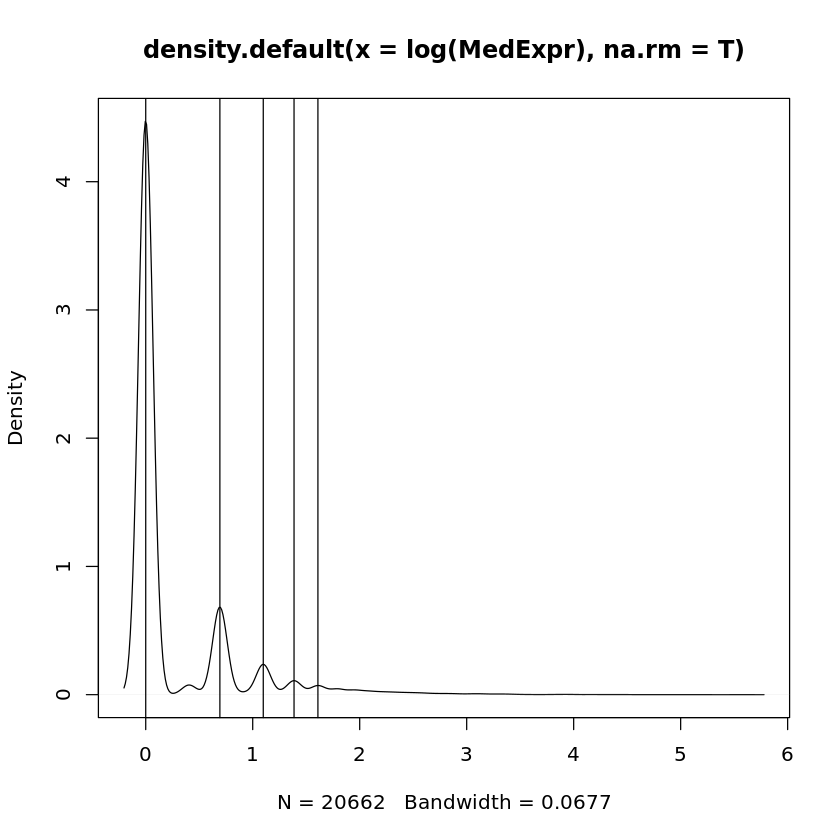

In [9]:
MedExpr <- apply(scd_counts, 1, function(c) median(c[c != 0]))
plot(density(log(MedExpr), na.rm=T))
abline(v=log(c(1,2,3,4,5)))

Setting up parallel computation using 6 cores
Warning message in SCnorm(Data = scd, Conditions = conditions, PrintProgressPlots = TRUE, :
“At least one cell/sample has less than 10,000 counts total. 
       Check the quality of your data or filtering criteria. 
       SCnorm may not be appropriate for your data (see vignette for details).”Warning message in SCnorm(Data = scd, Conditions = conditions, PrintProgressPlots = TRUE, :
“At least one cell/sample has less than 100 genes detected (non-zero). 
        Check the quality of your data or filtering criteria. 
        SCnorm may not be appropriate for your data (see vignette for details).”Gene filter is applied within each condition.
9432 genes in condition 1 will not be included in the normalization due to 
             the specified filter criteria.
A list of these genes can be accessed in output, 
    see vignette for example.
Finding K for Condition 1
Trying K = 1
Trying K = 2
Trying K = 3


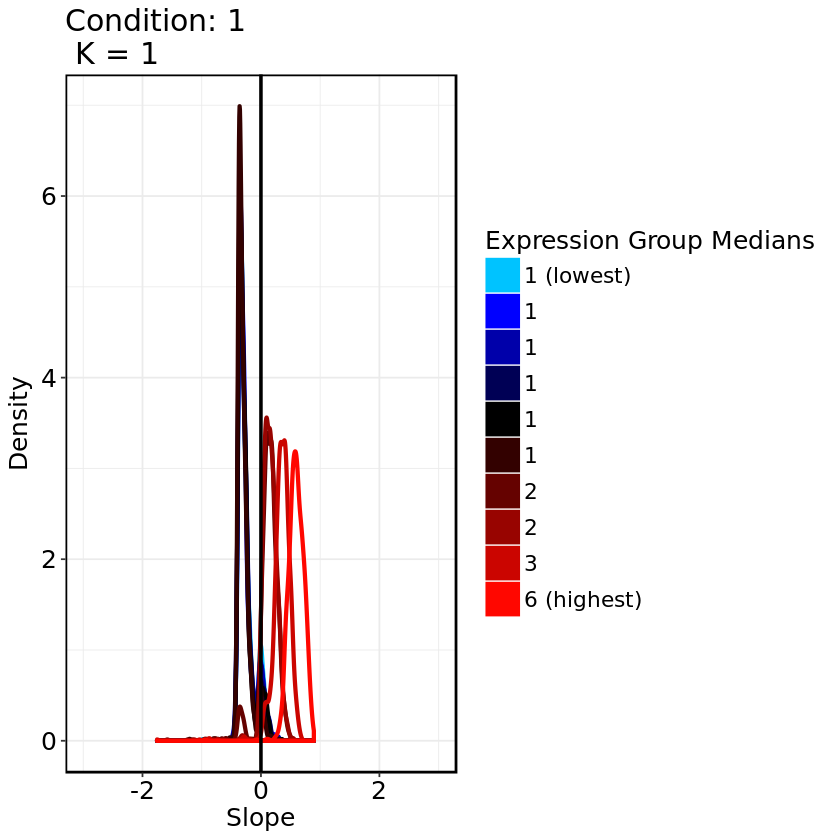

Trying K = 4


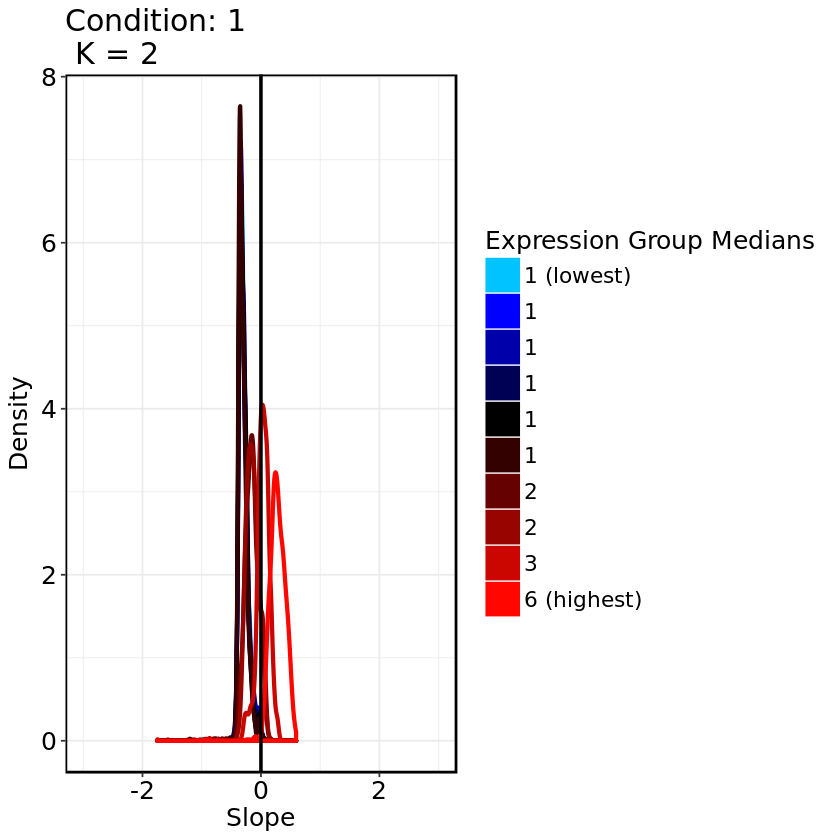

Trying K = 5


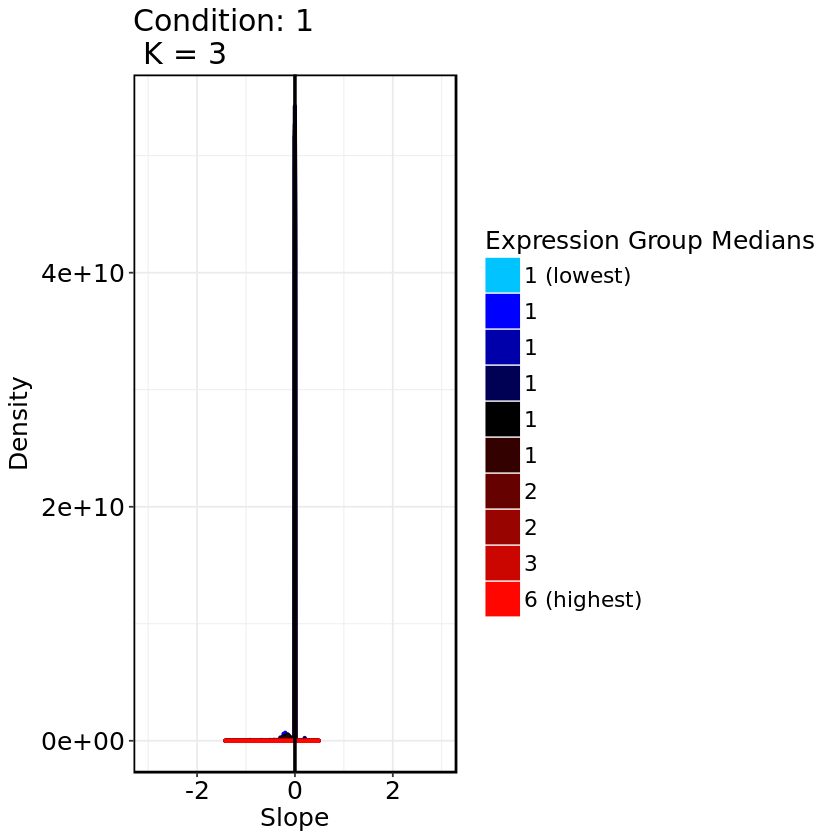

Trying K = 6


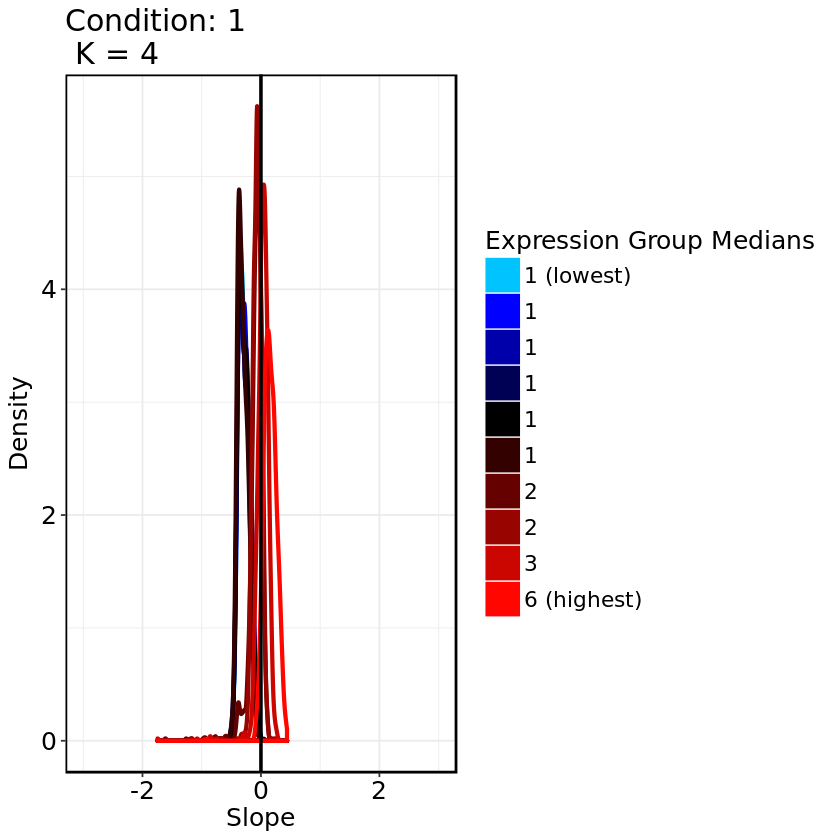

Trying K = 7


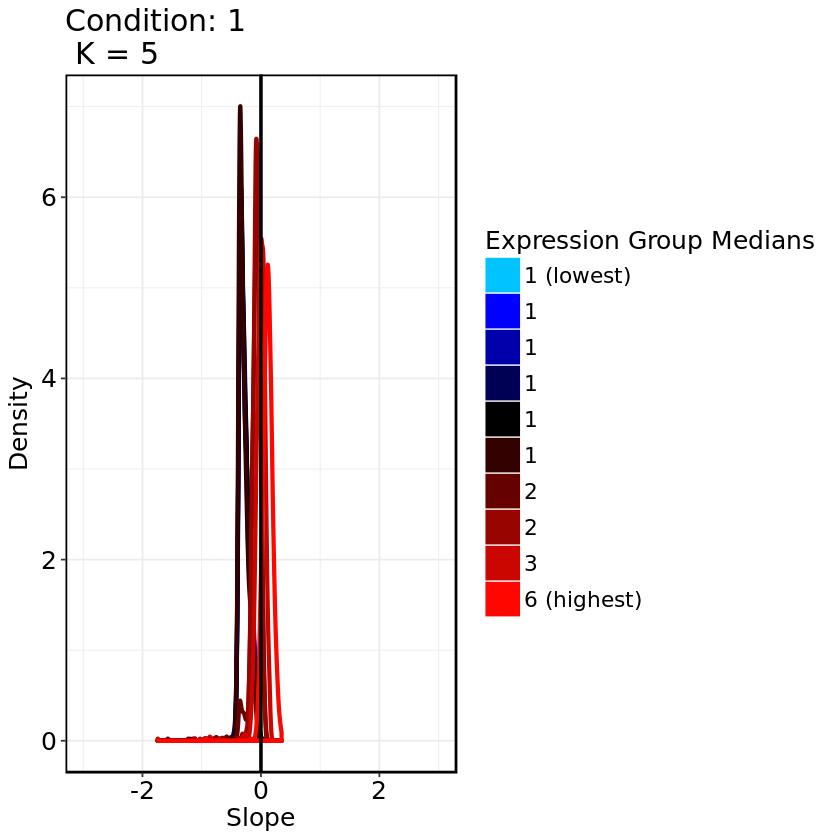

Trying K = 8


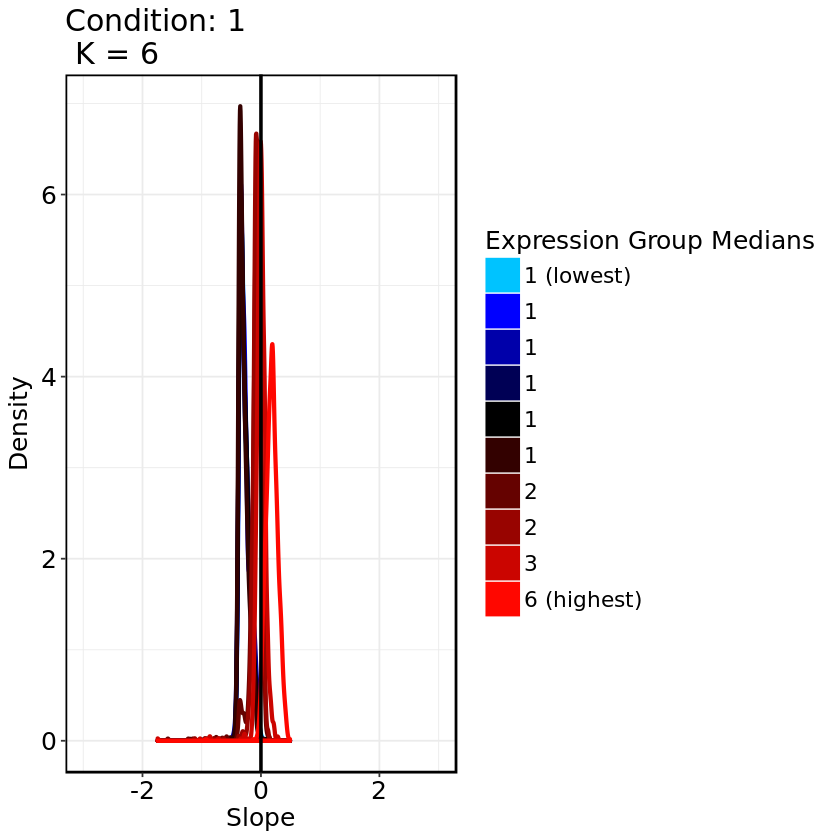

Trying K = 9


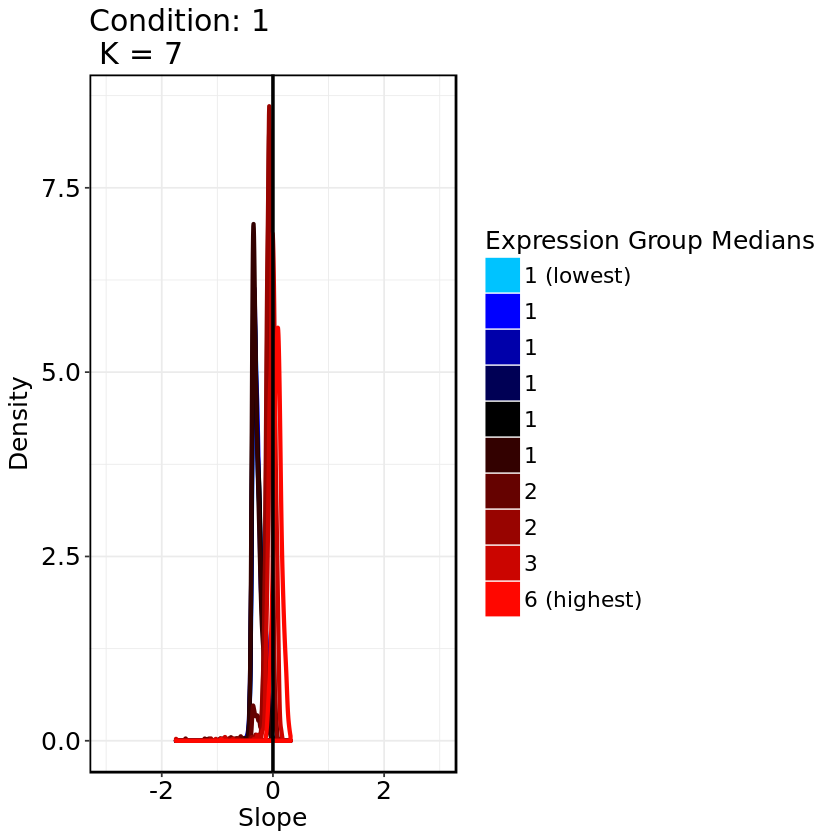

Trying K = 10


ERROR: Error: 'bplapply' receive data failed:
  error reading from connection


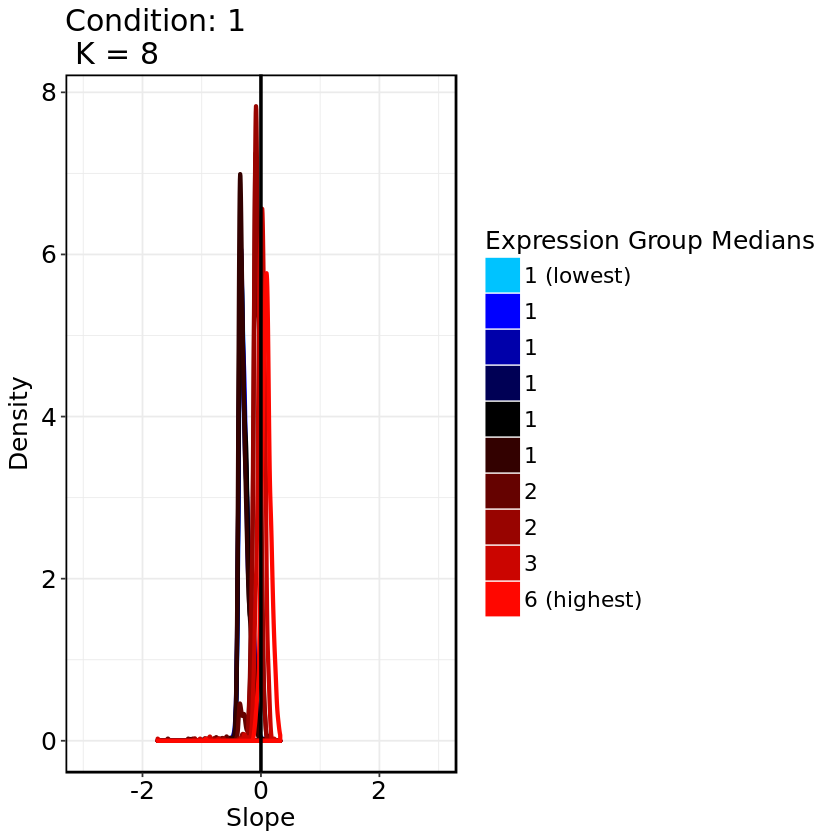

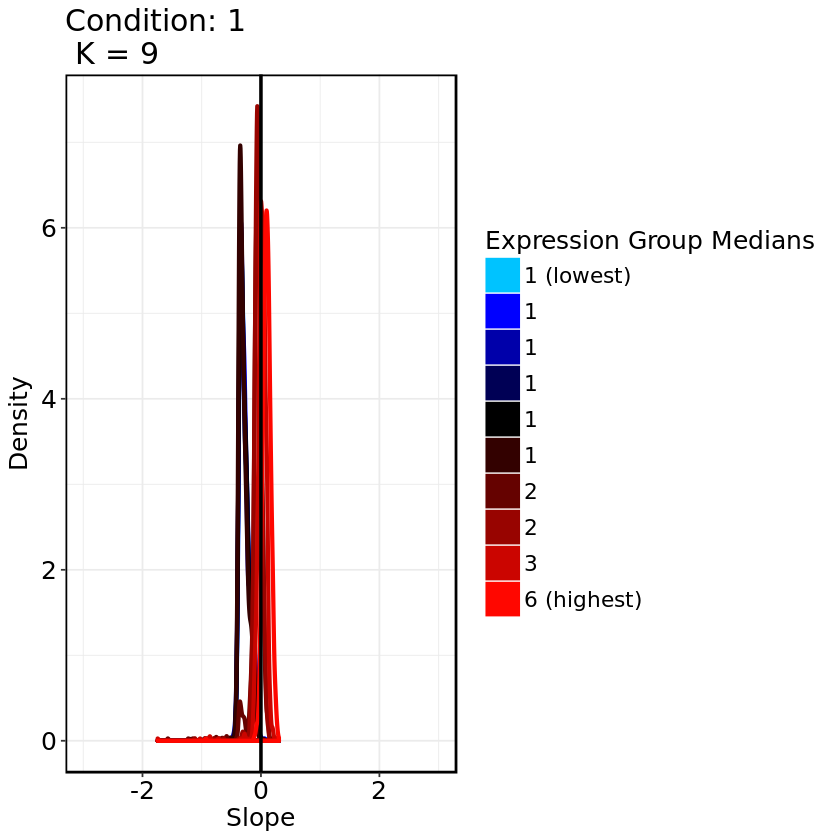

In [10]:
DataNorm <- SCnorm(
    Data = scd,
    Conditions = conditions,
    PrintProgressPlots = TRUE,
    FilterCellNum = 10,   # only consider genes with X number of non-zero expression values
    NCores=6
)

In [18]:
# This method does not appear to work well for shallow depth droplet methods.